In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

# 1. Read Data

In [2]:
df = pd.read_csv('train.csv',index_col='id')

In [3]:
df = df.reset_index(drop=True)

In [4]:
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


# 2. Plot Distribution
Plot the distributions of features for each class.

In [5]:
def plot(col):
    cmin = df[col].min()
    cmax = df[col].max()
    plt.hist(df[df.target==0][col],bins=30,range=(cmin,cmax),normed=True,alpha=0.5,label='neg')
    plt.hist(df[df.target==1][col],bins=30,range=(cmin,cmax),normed=True,alpha=0.5,label='pos')
    plt.title(col)
    plt.legend()
    plt.show()

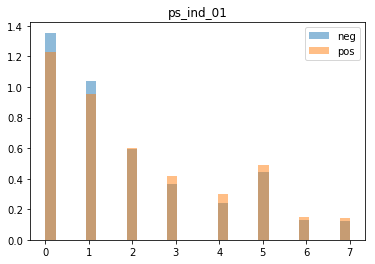

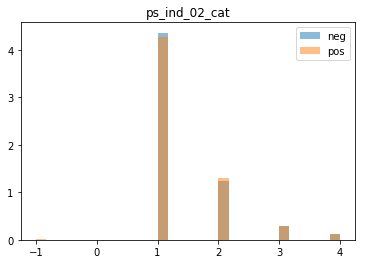

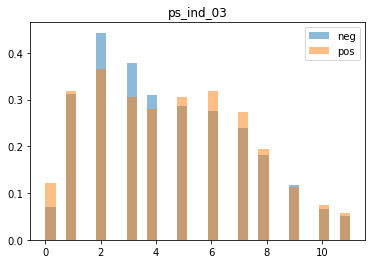

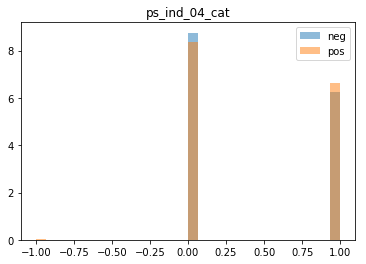

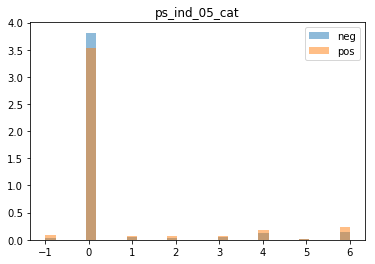

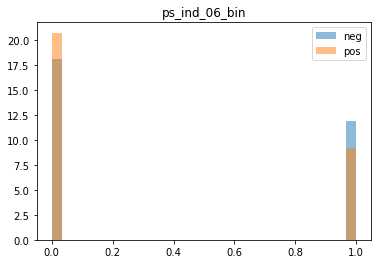

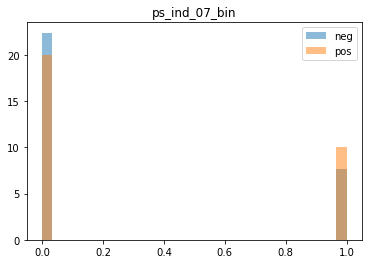

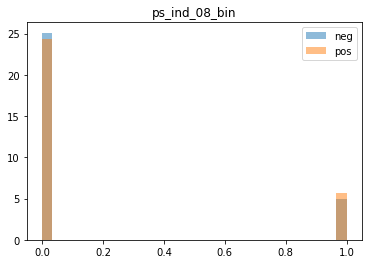

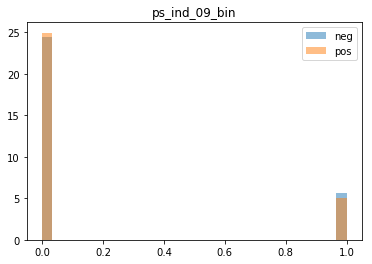

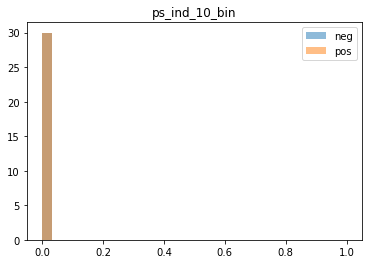

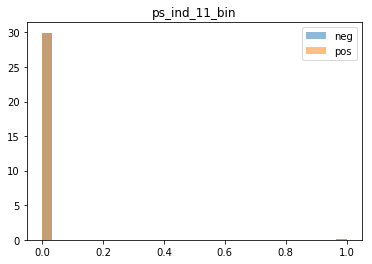

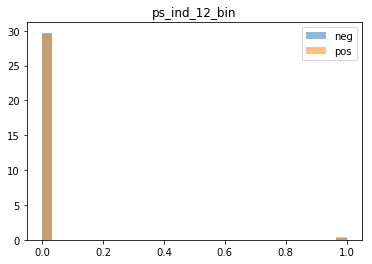

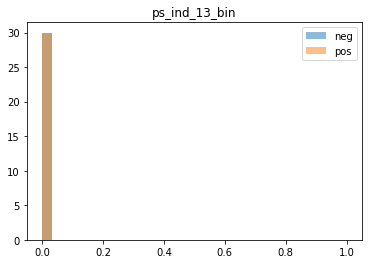

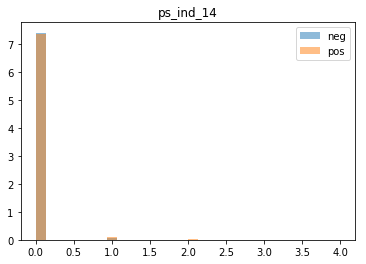

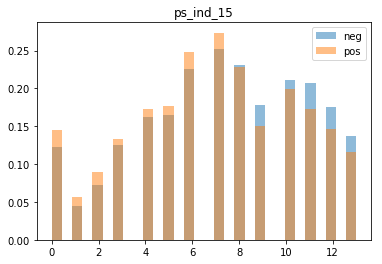

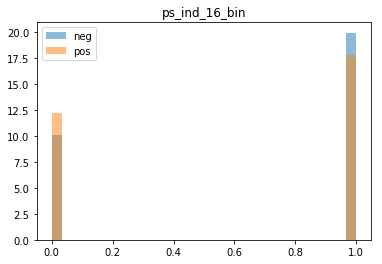

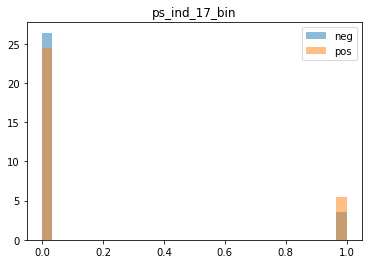

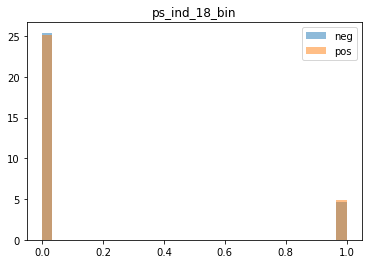

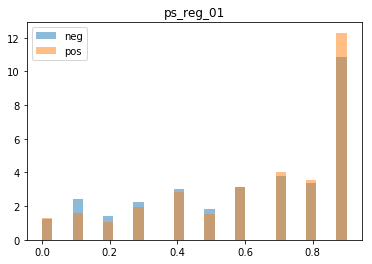

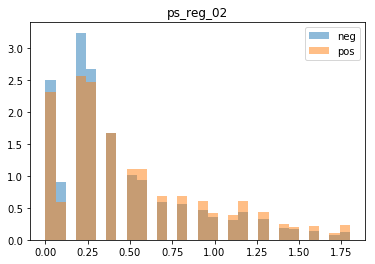

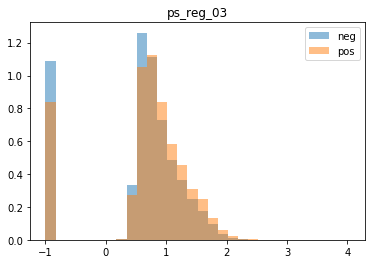

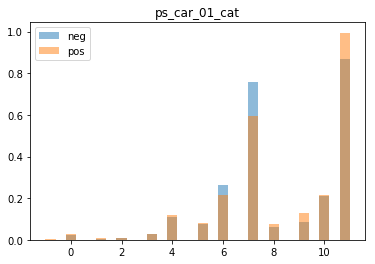

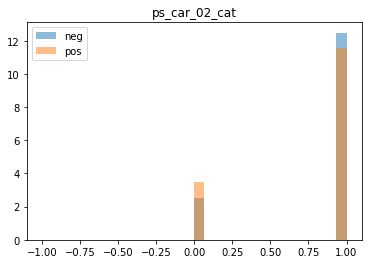

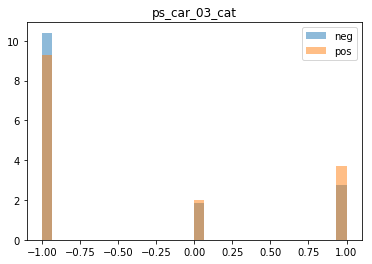

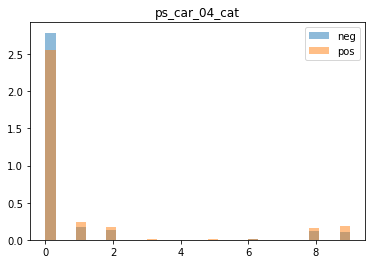

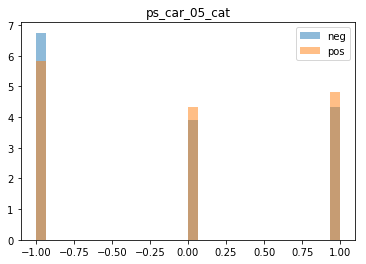

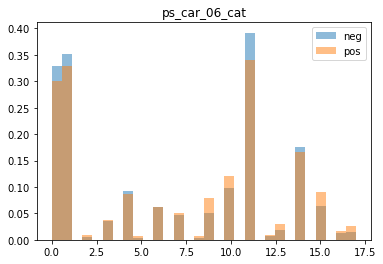

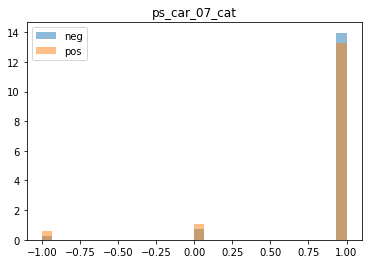

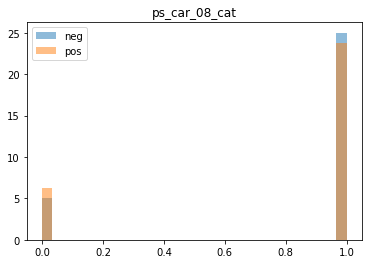

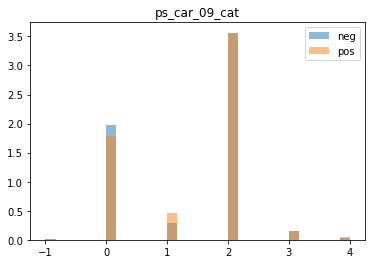

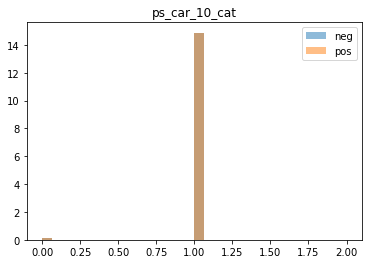

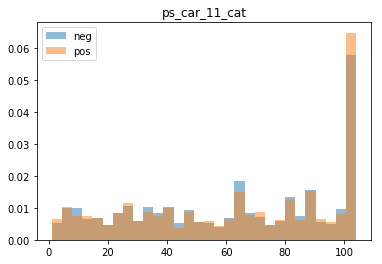

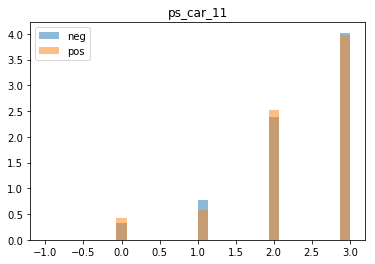

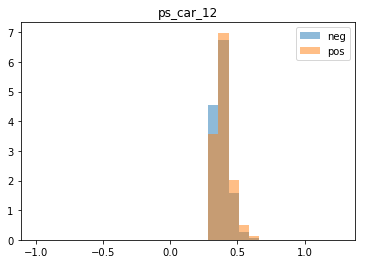

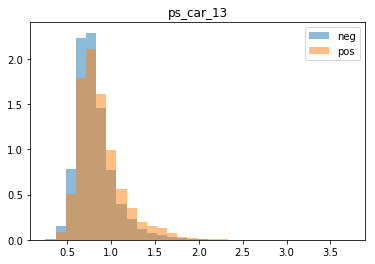

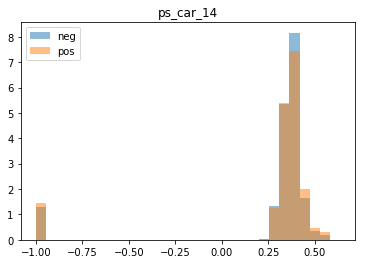

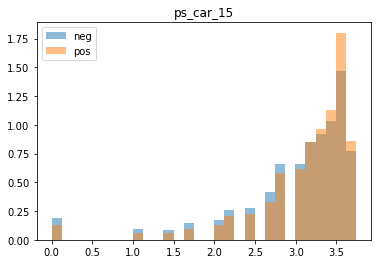

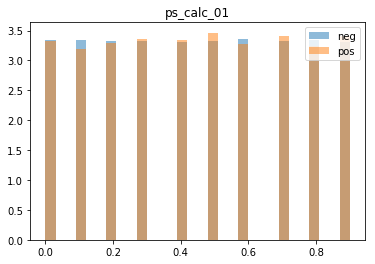

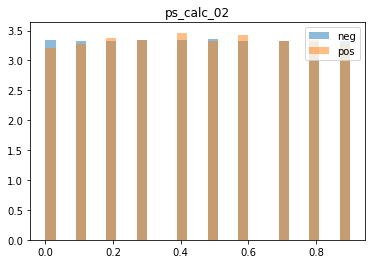

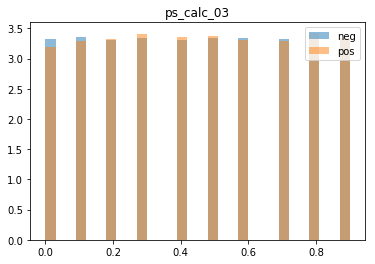

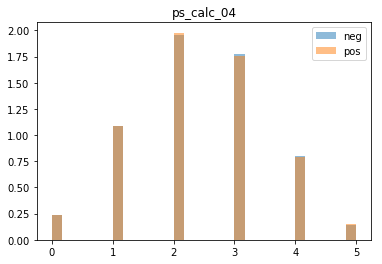

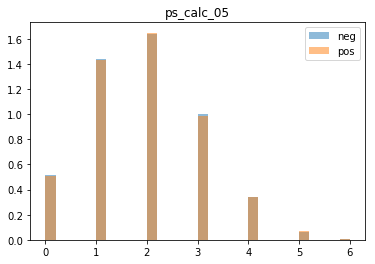

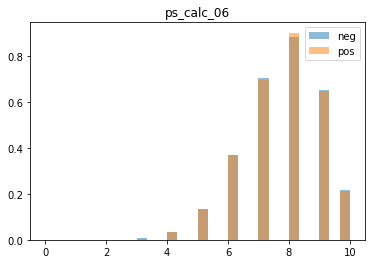

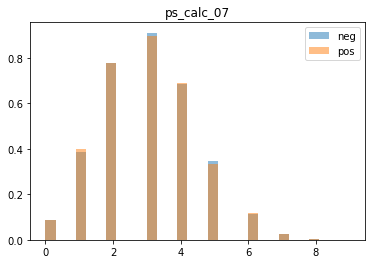

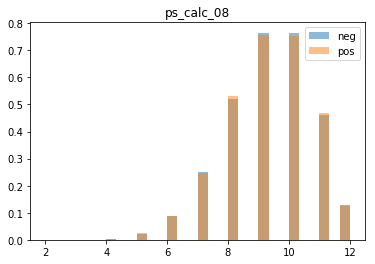

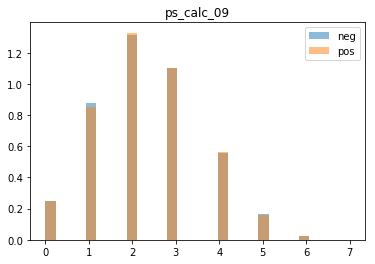

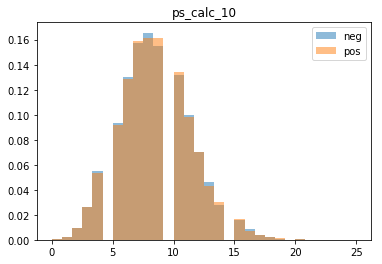

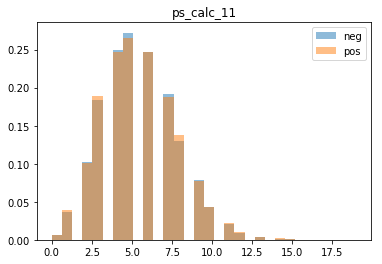

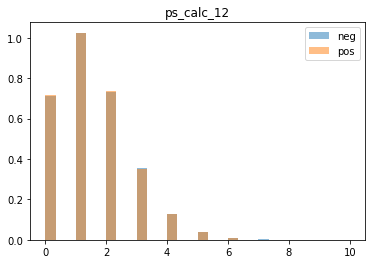

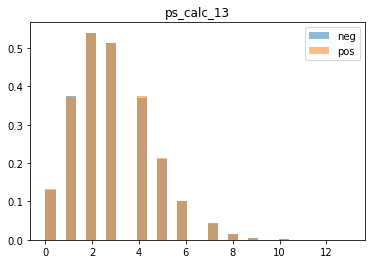

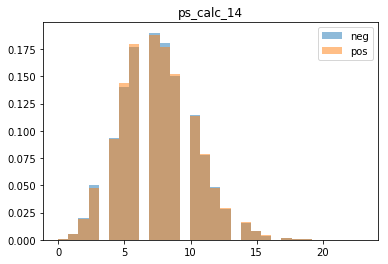

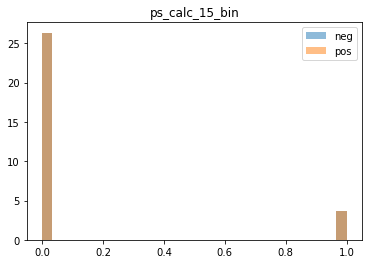

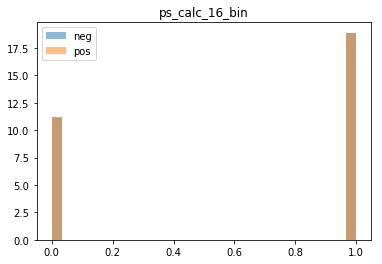

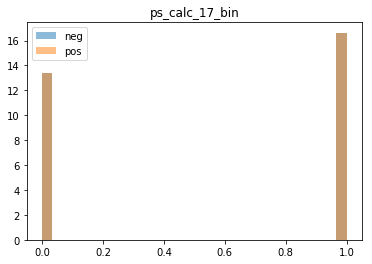

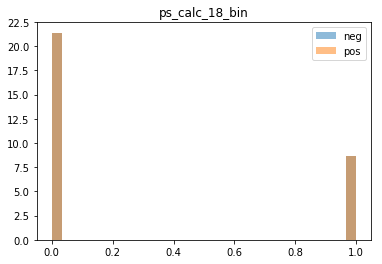

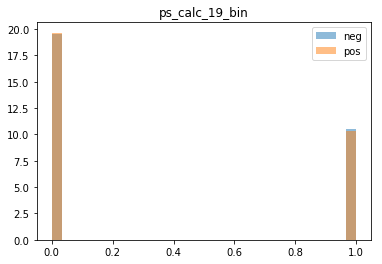

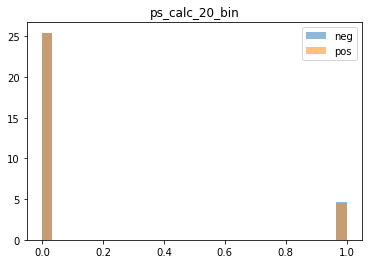

In [6]:
for col in df.columns:
    if col != 'target':
        plot(col)

# 3. Calculate the difference
Calculate the featurea distribution differences between classes.

In [7]:
def PNDiff(col):
    cmin = df[col].min()
    cmax = df[col].max()
    neg, nedges = np.histogram(df[df.target==0][col],bins=30,range=(cmin,cmax),normed=False)
    pos, pedges = np.histogram(df[df.target==1][col],bins=30,range=(cmin,cmax),normed=False)
    return abs(1.*pos/sum(pos)-1.*neg/sum(neg)).sum()

In [8]:
result = []
for col in df.columns:
    if col != 'target':
        result.append((col, PNDiff(col)))
result = sorted(result,key=lambda x:x[-1])

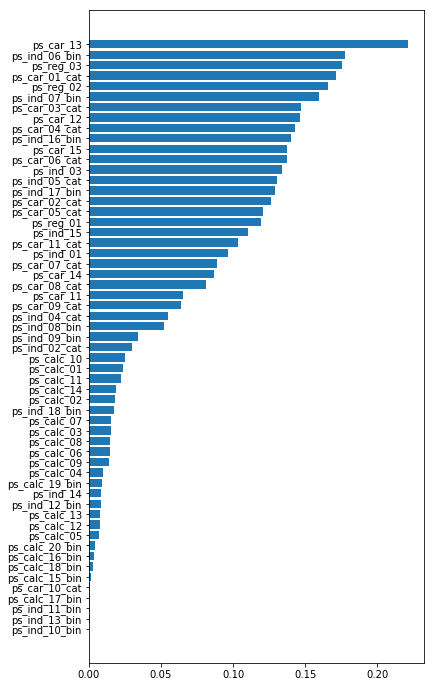

In [9]:
plt.figure(figsize=(6,12))
plt.barh(range(len(result)),zip(*result)[1])
plt.yticks(range(len(result)),zip(*result)[0])
plt.show()

# 4. Categorical

Replace the categorical feature values with their appearance frequencies.

In [51]:
col = 'ps_ind_05_cat'

tmp = df[[col,'target']].copy()
tmp['rank'] = 1

cntrank = tmp[[col,'rank']].groupby(col).count().rank().reset_index()
tmp = tmp.drop('rank',axis=1).merge(cntrank,how='left',on=col)

,ps_ind_05_cat,target,rank
0,0,0,8.0
1,0,0,8.0
2,0,0,8.0
3,0,0,8.0
4,0,0,8.0
5,0,0,8.0
6,0,0,8.0
7,0,0,8.0
8,0,0,8.0
9,0,1,8.0


In [54]:
col = 'ps_ind_05_cat'
def plot_cat(col):
    tmp = df[[col,'target']].copy()
    tmp['rank'] = 1
#     tmp = tmp.drop('cnt',axis=1)\
#              .merge(tmp[[col,'cnt']]
#                     .groupby(col,as_index=False)
#                     .count(),how='left',on=col)
    cntrank = tmp[[col,'rank']].groupby(col).count().rank().reset_index()
    tmp = tmp.drop('rank',axis=1).merge(cntrank,how='left',on=col)

    cmin = tmp[col].min()
    cmax = tmp[col].max()
    plt.subplot(1,2,1)
    plt.hist(tmp[tmp.target==0][col],bins=30,range=(cmin,cmax),normed=True,alpha=0.5,label='neg')
    plt.hist(tmp[tmp.target==1][col],bins=30,range=(cmin,cmax),normed=True,alpha=0.5,label='pos')
    plt.legend()
    plt.subplot(1,2,2)
    
    cmin = tmp['rank'].min()
    cmax = tmp['rank'].max()
    plt.hist(tmp[tmp.target==0]['rank'],bins=30,range=(cmin,cmax),normed=True,alpha=0.5,label='neg')
    plt.hist(tmp[tmp.target==1]['rank'],bins=30,range=(cmin,cmax),normed=True,alpha=0.5,label='pos')
    plt.legend()
    plt.show()

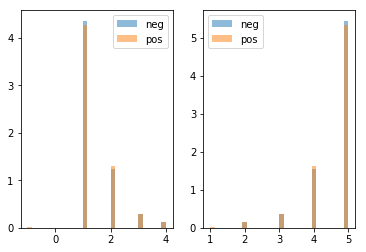

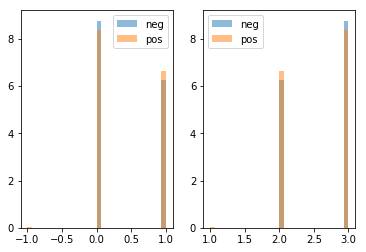

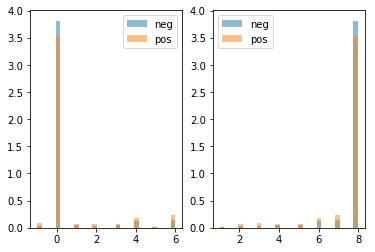

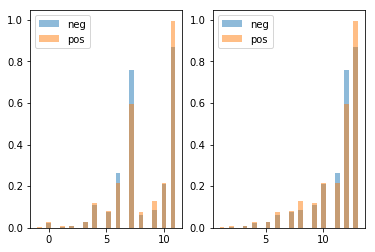

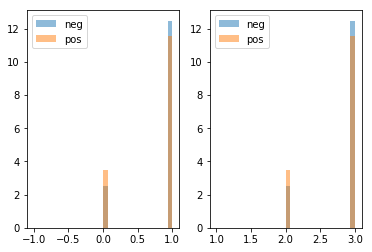

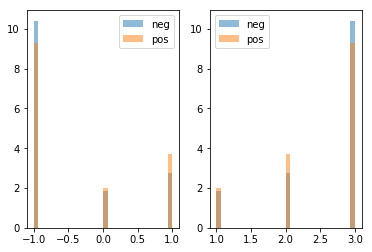

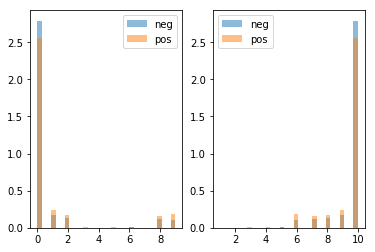

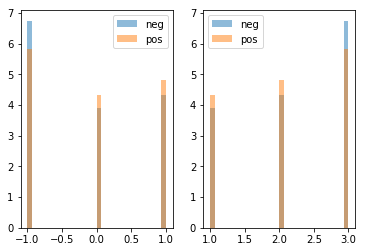

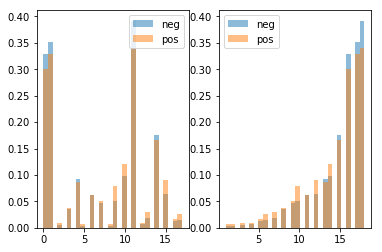

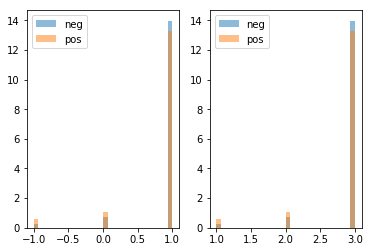

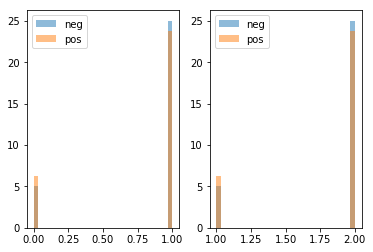

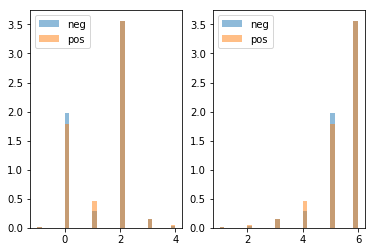

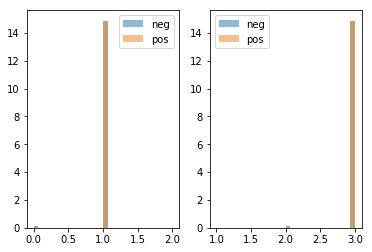

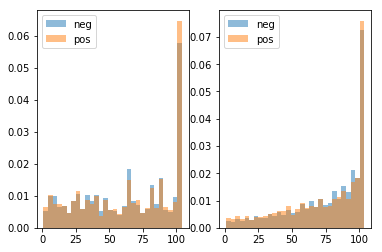

In [55]:
for col in df.columns:
    if 'cat' in col:
        plot_cat(col)